In [1]:
# 基于alphalens框架的因子分析
import numpy as np
import pandas as pd
from datetime import datetime
from alphalens import utils
from alphalens import plotting
from alphalens import tears
from alphalens import performance

In [2]:
# 数据准备阶段

# 时间区间
tradingDates=get_trading_dates('20190101', '20190801')
startDate=tradingDates[0]
endDate=tradingDates[-1]

# 股票池
stockList=index_components('000300.XSHG')

# 因子选择
factorName='pe_ratio'

In [3]:
# 查询沪深300的PE
q=query(fundamentals.eod_derivative_indicator.pe_ratio).filter(
fundamentals.eod_derivative_indicator.stockcode.in_(stockList))
d1=tradingDates[0]
d1_data=get_fundamentals(q, d1, expect_df=True)
d1_data

,,pe_ratio
order_book_id,date,
000001.XSHE,20190102,6.3581
000002.XSHE,20190102,7.8121
000063.XSHE,20190102,-11.7429
000069.XSHE,20190102,4.6315
000100.XSHE,20190102,9.8061
000157.XSHE,20190102,13.4146
000166.XSHE,20190102,21.8849
000333.XSHE,20190102,12.0016
000338.XSHE,20190102,6.9834


In [4]:
# 修改日期格式
d1_data=d1_data.reset_index()
d1_data['date']=d1
d1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 3 columns):
order_book_id    292 non-null object
date             292 non-null object
pe_ratio         292 non-null float64
dtypes: float64(1), object(2)
memory usage: 6.9+ KB


In [5]:
d1_data=d1_data.set_index(['date', 'order_book_id'])
d1_data

pe_ratio
date       order_book_id          
2019-01-02 000001.XSHE      6.3581
           000002.XSHE      7.8121
           000063.XSHE    -11.7429
           000069.XSHE      4.6315
           000100.XSHE      9.8061
           000157.XSHE     13.4146
           000166.XSHE     21.8849
           000333.XSHE     12.0016
           000338.XSHE      6.9834
           000413.XSHE     11.8387
           000415.XSHE      9.5780
           000423.XSHE     12.4068
           000425.XSHE     12.3303
           000538.XSHE     21.4404
           000568.XSHE     16.6409
           000596.XSHE     15.6852
           000625.XSHE     46.7052
           000627.XSHE     20.8945
           000629.XSHE      8.3113
           000630.XSHE     28.9612
           000651.XSHE      8.2191
           000656.XSHE      8.3684
           000661.XSHE     28.7494
           000671.XSHE      6.9115
           000703.XSHE     16.1397
           000709.XSHE      8.3454
           000723.XSHE      7.2621
           000725.XSHE     26.1358
           000728.XSHE     35.1921
           000768.XSHE     65.7384
...                            ...
           601838.XSHG      6.1614
           601857.XSHG     24.7111
           601877.XSHG     14.1069
           601878.XSHG     32.4306
           601881.XSHG     23.9112
           601888.XSHG     37.7278
           601898.XSHG     18.3116
           601899.XSHG     16.9340
           601901.XSHG     65.9697
           601919.XSHG     33.8874
           601933.XSHG     51.0734
           601939.XSHG      6.1360
           601985.XSHG     17.3173
           601988.XSHG      5.7869
           601989.XSHG    148.0407
           601992.XSHG     11.0038
           601997.XSHG      4.7294
           601998.XSHG      5.8595
           603019.XSHG     53.5947
           603156.XSHG     11.0801
           603160.XSHG     44.8657
           603259.XSHG     37.0673
           603260.XSHG     10.3085
           603288.XSHG     41.6611
           603501.XSHG     91.1679
           603799.XSHG     15.9206
           603833.XSHG     20.6711
           603899.XSHG     32.9073
           603986.XSHG     42.0283
           603993.XSHG     17.2865

[292 rows x 1 columns]

In [6]:
# 对第二天采取同样原处理
d2=tradingDates[1]
d2_data=get_fundamentals(q, d2, expect_df=True)
d2_data=d2_data.reset_index()
d2_data['date']=d2
d2_data=d2_data.set_index(['date', 'order_book_id'])
d2_data

pe_ratio
date       order_book_id          
2019-01-03 000001.XSHE      6.4204
           000002.XSHE      7.8677
           000063.XSHE    -11.2747
           000069.XSHE      4.6393
           000100.XSHE      9.8842
           000157.XSHE     13.6079
           000166.XSHE     22.3724
           000333.XSHE     11.9225
           000338.XSHE      6.9188
           000413.XSHE     11.8916
           000415.XSHE      9.6594
           000423.XSHE     12.2500
           000425.XSHE     12.2537
           000538.XSHE     20.8621
           000568.XSHE     16.0232
           000596.XSHE     15.1030
           000625.XSHE     47.2696
           000627.XSHE     20.7082
           000629.XSHE      8.6448
           000630.XSHE     29.1097
           000651.XSHE      8.2466
           000656.XSHE      8.4646
           000661.XSHE     28.3809
           000671.XSHE      6.9517
           000703.XSHE     16.0415
           000709.XSHE      8.3747
           000723.XSHE      7.2393
           000725.XSHE     26.1358
           000728.XSHE     36.1460
           000768.XSHE     68.0207
...                            ...
           601838.XSHG      6.1925
           601857.XSHG     24.8837
           601877.XSHG     13.4839
           601878.XSHG     33.0186
           601881.XSHG     24.3326
           601888.XSHG     35.9487
           601898.XSHG     18.4698
           601899.XSHG     17.1590
           601901.XSHG     72.5667
           601919.XSHG     34.8841
           601933.XSHG     51.0734
           601939.XSHG      6.1458
           601985.XSHG     17.3502
           601988.XSHG      5.8032
           601989.XSHG    151.1683
           601992.XSHG     10.7418
           601997.XSHG      4.7473
           601998.XSHG      5.8705
           603019.XSHG     52.7883
           603156.XSHG     11.0907
           603160.XSHG     44.5398
           603259.XSHG     36.9024
           603260.XSHG     10.0553
           603288.XSHG     40.2134
           603501.XSHG     89.5017
           603799.XSHG     15.9586
           603833.XSHG     20.2888
           603899.XSHG     32.8617
           603986.XSHG     41.6066
           603993.XSHG     17.4263

[292 rows x 1 columns]

In [7]:
# 拼接数据
pd.concat([d1_data, d2_data])

pe_ratio
date       order_book_id          
2019-01-02 000001.XSHE      6.3581
           000002.XSHE      7.8121
           000063.XSHE    -11.7429
           000069.XSHE      4.6315
           000100.XSHE      9.8061
           000157.XSHE     13.4146
           000166.XSHE     21.8849
           000333.XSHE     12.0016
           000338.XSHE      6.9834
           000413.XSHE     11.8387
           000415.XSHE      9.5780
           000423.XSHE     12.4068
           000425.XSHE     12.3303
           000538.XSHE     21.4404
           000568.XSHE     16.6409
           000596.XSHE     15.6852
           000625.XSHE     46.7052
           000627.XSHE     20.8945
           000629.XSHE      8.3113
           000630.XSHE     28.9612
           000651.XSHE      8.2191
           000656.XSHE      8.3684
           000661.XSHE     28.7494
           000671.XSHE      6.9115
           000703.XSHE     16.1397
           000709.XSHE      8.3454
           000723.XSHE      7.2621
           000725.XSHE     26.1358
           000728.XSHE     35.1921
           000768.XSHE     65.7384
...                            ...
2019-01-03 601838.XSHG      6.1925
           601857.XSHG     24.8837
           601877.XSHG     13.4839
           601878.XSHG     33.0186
           601881.XSHG     24.3326
           601888.XSHG     35.9487
           601898.XSHG     18.4698
           601899.XSHG     17.1590
           601901.XSHG     72.5667
           601919.XSHG     34.8841
           601933.XSHG     51.0734
           601939.XSHG      6.1458
           601985.XSHG     17.3502
           601988.XSHG      5.8032
           601989.XSHG    151.1683
           601992.XSHG     10.7418
           601997.XSHG      4.7473
           601998.XSHG      5.8705
           603019.XSHG     52.7883
           603156.XSHG     11.0907
           603160.XSHG     44.5398
           603259.XSHG     36.9024
           603260.XSHG     10.0553
           603288.XSHG     40.2134
           603501.XSHG     89.5017
           603799.XSHG     15.9586
           603833.XSHG     20.2888
           603899.XSHG     32.8617
           603986.XSHG     41.6066
           603993.XSHG     17.4263

[584 rows x 1 columns]

In [8]:
# 拼接每个交易日的数据
factorsDatas=pd.DataFrame()
for date in tradingDates:
    daily_data=get_fundamentals(q, date, expect_df=True)
    daily_data=daily_data.reset_index()
    daily_data['date']=date
    daily_data=daily_data.set_index(['date', 'order_book_id'])
    factorsDatas=pd.concat([factorsDatas, daily_data])

In [9]:
# 因子数据预处理

# 去极值化函数
def winsorize_series(series):
    qt=series.quantile([0.02, 0.98])
    if isinstance(qt, pd.Series) and len(qt)==2:
        series[series<qt.iloc[0]]=qt.iloc[0]
        series[series>qt.iloc[1]]=qt.iloc[1]
    return series

# 标准化函数
def standardize_series(series):
    std=series.std()
    mean=series.mean()
    return (series-mean)/std

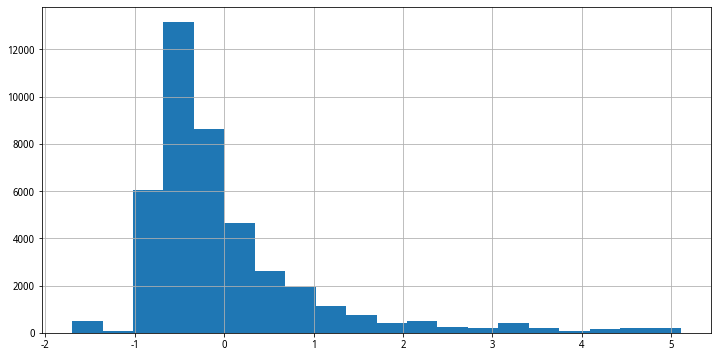

In [10]:
#alphalens要求的factor格式是multiindex series,此处先把dataframe转换成series
factorsDatasSeries=factorsDatas['pe_ratio']
factorsDatasSeries=factorsDatasSeries.groupby(level='date').apply(winsorize_series)
factorsDatasSeries=factorsDatasSeries.groupby(level='date').apply(standardize_series)

factorsDatasSeries.hist(figsize=(12,6), bins=20)
factorsDatas['pe_ratio']=factorsDatasSeries

In [11]:
# 获取行情数据

price=get_price(stockList, start_date=startDate, end_date=endDate, fields='close')
price

,600100.XSHG,601727.XSHG,002153.XSHE,600221.XSHG,002422.XSHE,601398.XSHG,000961.XSHE,600340.XSHG,600816.XSHG,600066.XSHG,...,000063.XSHE,000703.XSHE,601288.XSHG,002024.XSHE,603259.XSHG,600068.XSHG,002456.XSHE,600000.XSHG,600583.XSHG,002415.XSHE
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,10.01,4.8883,25.4327,1.87,20.0172,4.9802,5.4946,24.1999,4.40,11.4666,...,19.56,11.2266,3.3598,9.9271,51.0586,6.1035,9.18,9.4076,4.8074,25.0234
2019-01-03,9.72,4.9377,24.9243,1.88,19.2923,4.9802,5.4946,24.1036,4.45,11.5437,...,18.78,11.1583,3.3788,9.9667,50.8315,6.0647,8.71,9.5143,4.8173,24.7014
2019-01-04,9.90,5.0364,25.8315,1.91,19.9675,5.0473,5.7214,25.0274,4.74,11.7268,...,19.20,11.3731,3.4266,10.2141,51.5199,6.1810,8.91,9.6598,4.8966,25.2770
2019-01-07,10.04,5.0957,26.9780,1.92,20.0271,5.0186,5.7905,25.4026,4.70,11.9002,...,20.02,11.8709,3.4075,10.2240,51.2502,6.2682,9.03,9.6792,4.9561,26.4965
2019-01-08,10.05,5.0759,26.5493,1.91,19.9675,4.9802,5.7214,24.9119,4.66,12.0448,...,19.90,12.1345,3.3693,10.1745,50.7747,6.2682,9.10,9.6598,5.0056,26.5355
2019-01-09,10.11,5.0167,26.2802,1.91,20.2058,5.0377,5.6919,25.1332,4.63,11.9773,...,19.92,12.3395,3.3884,10.6199,51.2076,6.2391,9.15,9.6889,5.0552,27.4428
2019-01-10,10.00,5.0364,26.1206,1.91,20.2356,4.9994,5.6031,24.8157,4.54,11.7172,...,20.07,12.3298,3.3502,10.5605,51.3425,6.1810,9.09,9.6598,5.0849,27.6379
2019-01-11,10.11,5.0759,26.0309,1.95,20.1959,5.0186,5.6919,25.1236,4.55,11.7750,...,20.51,12.1345,3.3693,10.5704,51.3709,6.2294,9.26,9.7471,5.1741,27.7550
2019-01-14,10.15,5.0068,26.5992,1.92,19.5306,4.9802,5.7313,25.2198,4.54,11.6883,...,20.09,12.0564,3.3407,10.6793,50.7818,6.2100,9.01,9.7568,5.1246,27.3355


In [12]:
# 开始使用alphalens进行因子分析
factor_data_analysis=utils.get_clean_factor_and_forward_returns(factorsDatasSeries, price)

Dropped 7.1% entries from factor data: 7.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [13]:
factor_data_analysis

1D        5D       10D    factor  \
date       asset                                                 
2019-01-02 000001.XSHE  0.009790  0.081610  0.140362 -0.670288   
           000002.XSHE  0.007115  0.059832  0.063601 -0.622424   
           000063.XSHE -0.039877  0.018405  0.038344 -0.809417   
           000069.XSHE  0.001678  0.045231  0.033499 -0.727127   
           000100.XSHE  0.007982  0.123527  0.067739 -0.556783   
           000157.XSHE  0.014401  0.048995  0.054755 -0.437994   
           000166.XSHE  0.022286  0.089120  0.084167 -0.159159   
           000333.XSHE -0.006586  0.070251  0.130624 -0.484509   
           000338.XSHE -0.009262  0.026443  0.074069 -0.649704   
           000413.XSHE  0.004492  0.082781  0.089496 -0.489872   
           000415.XSHE  0.008499  0.067989  0.082153 -0.564292   
           000423.XSHE -0.012643  0.026296  0.025537 -0.471170   
           000425.XSHE -0.006200  0.018664  0.018664 -0.473689   
           000538.XSHE -0.026971  0.033087  0.070485 -0.173792   
           000568.XSHE -0.037122 -0.002777  0.038132 -0.331787   
           000596.XSHE -0.037122  0.021212  0.100757 -0.363248   
           000625.XSHE  0.012082  0.125379  0.126893  0.657905   
           000627.XSHE -0.008897  0.008915 -0.005335 -0.191762   
           000629.XSHE  0.040134  0.043478  0.113712 -0.605991   
           000630.XSHE  0.005140  0.035931  0.035931  0.073787   
           000651.XSHE  0.003354  0.047765  0.098044 -0.609026   
           000656.XSHE  0.011495 -0.027913 -0.021339 -0.604111   
           000661.XSHE -0.012816  0.051323  0.087243  0.066815   
           000671.XSHE  0.005838  0.042728  0.031071 -0.652071   
           000703.XSHE -0.006084  0.099131  0.076524 -0.348286   
           000709.XSHE  0.003520  0.031608  0.066664 -0.604868   
           000723.XSHE -0.003135  0.031348  0.300940 -0.640530   
           000725.XSHE  0.000000  0.042613  0.034872 -0.019223   
           000728.XSHE  0.027101  0.106981  0.099846  0.278903   
           000768.XSHE  0.034718  0.058117  0.064908  1.284462   
...                          ...       ...       ...       ...   
2019-07-18 601838.XSHG -0.010676  0.010676 -0.002372 -0.650624   
           601857.XSHG  0.003054 -0.009193 -0.010728 -0.248657   
           601877.XSHG  0.003015  0.025840  0.033592 -0.457599   
           601878.XSHG  0.014525 -0.005587 -0.024581  0.116674   
           601881.XSHG  0.011188  0.009466 -0.037005 -0.093356   
           601888.XSHG  0.007981  0.034038  0.050469  0.137827   
           601898.XSHG  0.008621  0.010776 -0.002155 -0.458049   
           601899.XSHG  0.039660  0.022663  0.014164 -0.207023   
           601901.XSHG  0.001392 -0.033280 -0.041607  0.426180   
           601919.XSHG  0.043033 -0.012295 -0.047131 -0.184427   
           601933.XSHG  0.038380  0.044776  0.005330  0.379316   
           601939.XSHG  0.002766  0.024896  0.013831 -0.635385   
           601985.XSHG  0.012939  0.024030  0.036969 -0.350999   
           601988.XSHG  0.005479  0.013699  0.008219 -0.663260   
           601989.XSHG  0.000000 -0.013445 -0.001681  3.249234   
           601992.XSHG  0.005587 -0.008380 -0.025140 -0.561507   
           601997.XSHG  0.006928  0.020785  0.016166 -0.682328   
           601998.XSHG  0.005060  0.027903  0.038445 -0.654521   
           603019.XSHG -0.004407  0.048179  0.031727  0.785043   
           603156.XSHG -0.001815  0.019062 -0.003026 -0.494239   
           603160.XSHG -0.006922  0.069152  0.108286  0.215381   
           603259.XSHG  0.010423  0.020224  0.009490  0.496957   
           603260.XSHG  0.039385  0.002882  0.037784 -0.441161   
           603288.XSHG  0.012076  0.006886 -0.032934  0.601519   
           603501.XSHG -0.005938  0.151245  0.168893  4.931327   
           603799.XSHG  0.009953 -0.026066  0.166825  4.931327   
           603833.XSHG -0.006585 -0.007526 -0.074412 -0.124983   
           603899.XSHG  0.006368  0.014773 -0.011717  0.204836   
    

In [14]:
factor_data_analysis['factor']=np.float128(factor_data_analysis['factor'])

In [15]:
#IC -->information coefficient
#计算方法corr(factor,r)
#意义：IC反映了因子和收益率之间的相关程度
#如果IC比较大，因子和收益率关联很大-->因子有一定的挖掘价值

#使用performance.factor_information_coefficient计算IC
IC_data=performance.factor_information_coefficient(factor_data_analysis)

In [16]:
IC_data['1D']

date
2019-01-02    0.087844
2019-01-03    0.090816
2019-01-04    0.187607
2019-01-07    0.020762
2019-01-08   -0.180570
2019-01-09   -0.050528
2019-01-10   -0.007709
2019-01-11   -0.097553
2019-01-14    0.133318
2019-01-15   -0.109554
2019-01-16   -0.223561
2019-01-17   -0.077357
2019-01-18   -0.015314
2019-01-21   -0.133252
2019-01-22   -0.016329
2019-01-23    0.201409
2019-01-24   -0.343064
2019-01-25    0.076908
2019-01-28   -0.344422
2019-01-29   -0.262036
2019-01-30   -0.148031
2019-01-31    0.348326
2019-02-01    0.266609
2019-02-11    0.057524
2019-02-12    0.201774
2019-02-13   -0.008584
2019-02-14    0.168014
2019-02-15    0.272008
2019-02-18    0.030229
2019-02-19   -0.057121
                ...   
2019-06-06   -0.115582
2019-06-10    0.246054
2019-06-11   -0.079164
2019-06-12    0.133665
2019-06-13   -0.187885
2019-06-14   -0.145422
2019-06-17    0.053101
2019-06-18    0.233129
2019-06-19    0.144001
2019-06-20    0.290927
2019-06-21   -0.106533
2019-06-24    0.267338
2019-0

In [25]:
# 计算平均IC，标准差，IR
IC_mean=IC_data['1D'].mean()
IC_std=IC_data['1D'].std()
IR=IC_mean/IC_std
print(IC_mean, IC_std, IR)

-0.0050608849775883435 0.16142963268404878 -0.03135040880315663


In [18]:
# IC>0.02的频率
freq=IC_data[IC_data['1D']>0.02]['1D'].count()/IC_data['1D'].count()
freq

0.4393939393939394

In [20]:
fact_return=performance.factor_returns(factor_data_analysis)
fact_return

,1D,5D,10D
date,,,
2019-01-02,0.007659,0.019169,0.014455
2019-01-03,0.009074,0.007796,0.002494
2019-01-04,0.004981,-0.000835,-0.008831
2019-01-07,0.000745,-0.004576,-0.016227
2019-01-08,-0.003919,-0.005869,-0.017513
2019-01-09,-0.003127,-0.004727,-0.013883
2019-01-10,0.000538,-0.005090,-0.006405
2019-01-11,0.001014,-0.007751,-0.014325
2019-01-14,-0.000268,-0.011405,-0.014410


In [21]:
mean_fact_return=fact_return.iloc[:, 0].mean()
mean_fact_return

0.00047474499873145445

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-1.699143,-0.533309,-0.812900,0.229770,7866,20.146501
2,-0.782996,-0.373019,-0.555142,0.085178,7790,19.951849
3,-0.474410,-0.040028,-0.291631,0.092751,7765,19.887819
4,-0.218183,0.654843,0.098129,0.187216,7790,19.951849
5,0.207592,5.107167,1.559929,1.169156,7833,20.061981


Returns Analysis


,1D,5D,10D
Ann. alpha,0.062,0.013,0.015
beta,0.108,0.145,0.149
Mean Period Wise Return Top Quantile (bps),4.079,2.753,2.299
Mean Period Wise Return Bottom Quantile (bps),-5.359,-5.122,-4.724
Mean Period Wise Spread (bps),9.438,7.851,6.977


Information Analysis


,1D,5D,10D
IC Mean,-0.005,0.002,0.005
IC Std.,0.161,0.188,0.175
Risk-Adjusted IC,-0.031,0.011,0.031
t-stat(IC),-0.360,0.129,0.355
p-value(IC),0.719,0.897,0.723
IC Skew,0.037,0.012,0.022
IC Kurtosis,-0.676,-0.705,-0.518


/usr/local/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:743: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  "or DatetimeIndex", PerformanceWarning)


Turnover Analysis


,10D,1D,5D
Quantile 1 Mean Turnover,0.041,0.013,0.027
Quantile 2 Mean Turnover,0.098,0.030,0.067
Quantile 3 Mean Turnover,0.137,0.041,0.094
Quantile 4 Mean Turnover,0.138,0.040,0.095
Quantile 5 Mean Turnover,0.066,0.017,0.044


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.998,0.992,0.985


<Figure size 432x288 with 0 Axes>

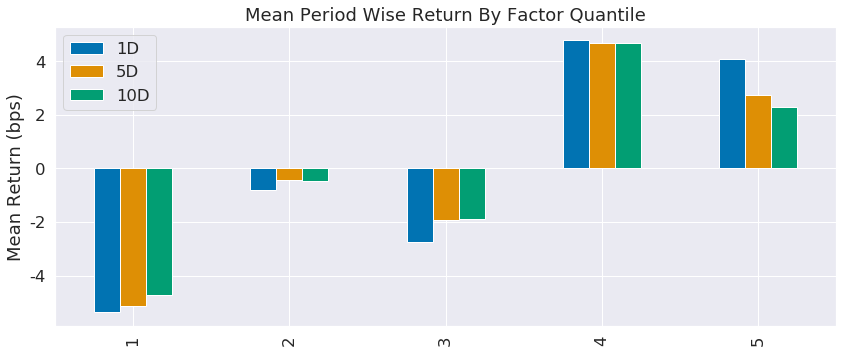

In [24]:
tears.create_summary_tear_sheet(factor_data_analysis)

Returns Analysis


,1D,5D,10D
Ann. alpha,0.062,0.013,0.015
beta,0.108,0.145,0.149
Mean Period Wise Return Top Quantile (bps),4.079,2.753,2.299
Mean Period Wise Return Bottom Quantile (bps),-5.359,-5.122,-4.724
Mean Period Wise Spread (bps),9.438,7.851,6.977


/usr/local/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:743: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  "or DatetimeIndex", PerformanceWarning)
/usr/local/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:743: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  "or DatetimeIndex", PerformanceWarning)
/usr/local/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:743: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  "or DatetimeIndex", PerformanceWarning)
/usr/local/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:743: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  "or DatetimeIndex", PerformanceWarning)
/usr/local/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:743: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  "or DatetimeInd

<Figure size 432x288 with 0 Axes>

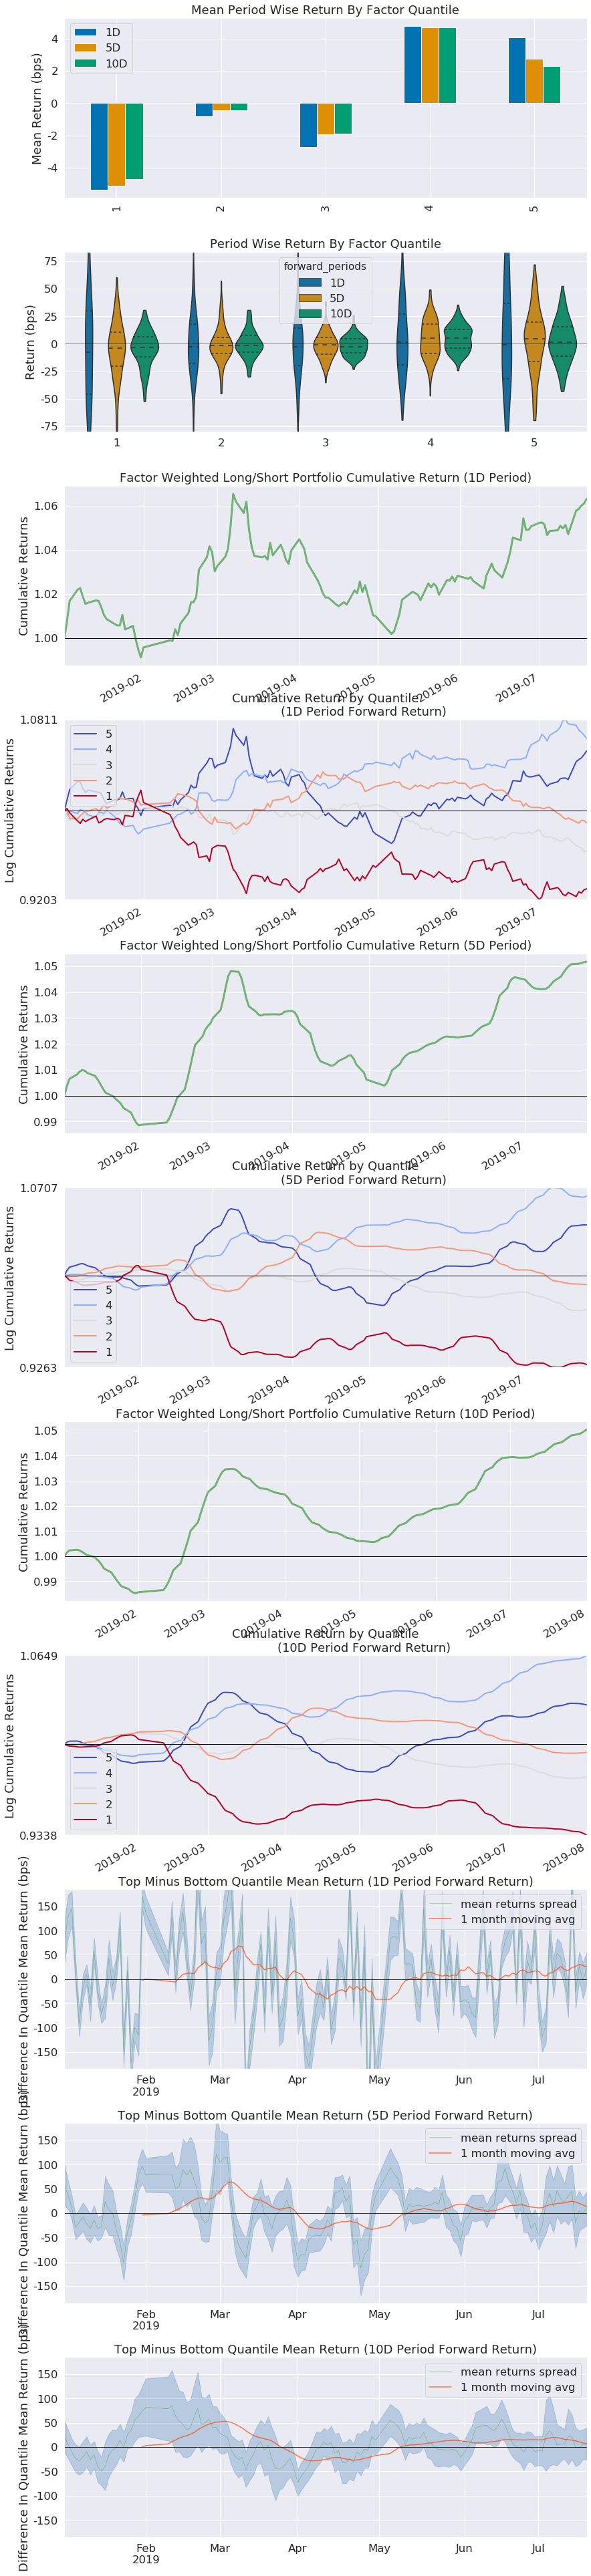

KeyError: 'group'

In [26]:
tears.create_returns_tear_sheet(factor_data_analysis, by_group=True)